In [6]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import utility
import seaborn as sns

%matplotlib inline

pd.set_option('display.float_format',lambda x: '%.3f' % x)

# Old Pipeline

In [5]:
folder='/Users/yyu/Documents/Psychology/insight/EEG_data/Matlab/Autoclave_Yuhua/export/'

In [97]:
subid='103'
channel='T7'

In [98]:
df=pd.read_csv(folder+subid+'/log_'+subid+'_ANA_1_'+channel+'.csv')

In [99]:
df.rename(columns={'0':'freq'},inplace=True)
df.set_index('freq',inplace=True)
df=df.T

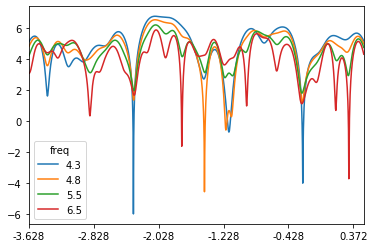

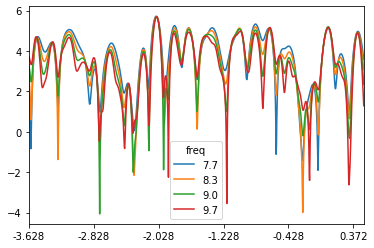

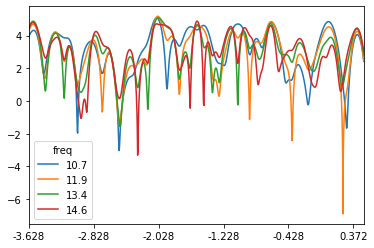

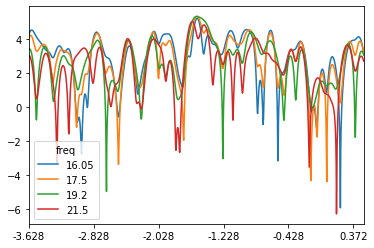

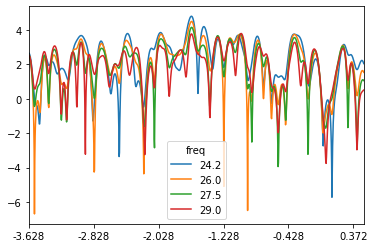

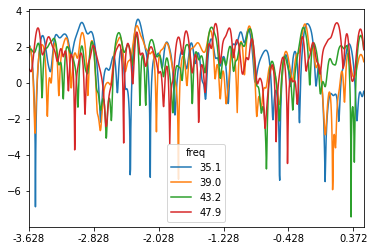

In [100]:
cols=df.columns
for i in range(6):
    df[cols[i*4:i*4+4]].plot()
    
    

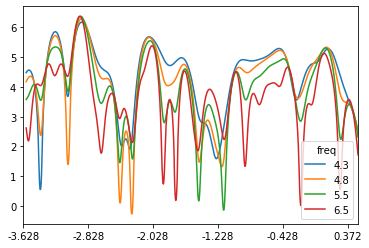

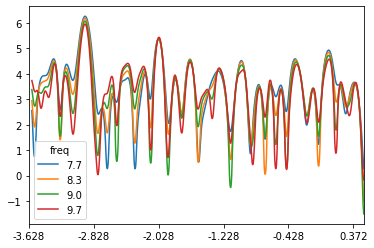

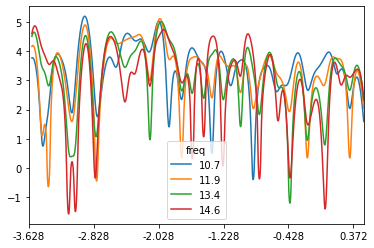

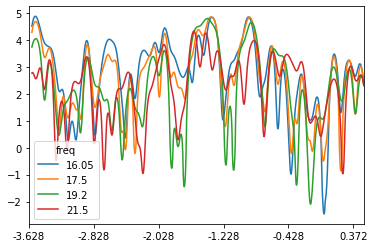

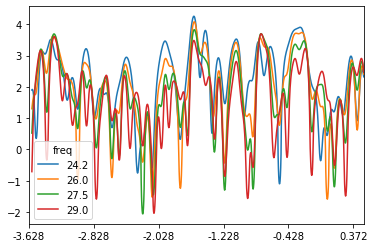

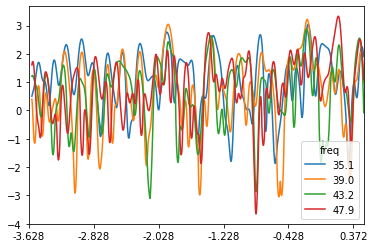

In [64]:
cols=df.columns
for i in range(6):
    df[cols[i*4:i*4+4]].rolling(10).mean().plot()

In [71]:
freqband={'Theta':[4.3,4.8,5.5,6.5,7.7],'Alpha1':[8.3,9.0,9.7],
         'Alpha2':[10.7,11.9,13.4],
         'Beta1':[14.6, 16.05, 17.5],
         'Beta2':[19.2, 21.5, 24.2],
         'Gamma1':[26.0, 27.5, 29],
         'Gamma2':[35.1, 39],
         'Gamma3':[43.2, 47.9]}

In [101]:
newdf=pd.DataFrame(index=df.index)
for k,v in freqband.items():
    newdf[k]=df[v].mean(axis=1)

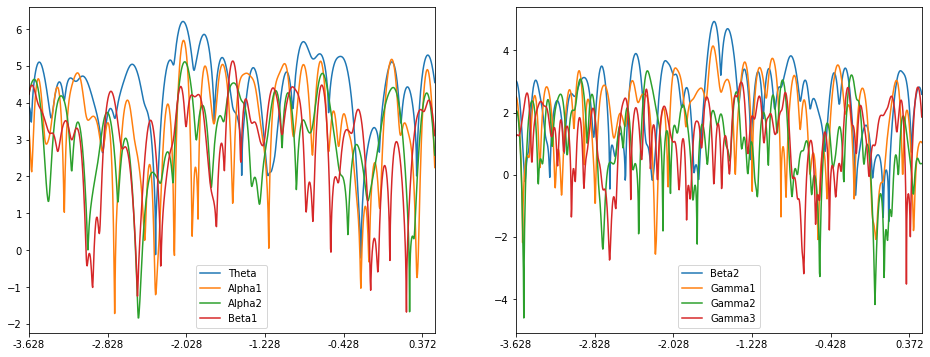

In [102]:
fig,ax=plt.subplots(1,2,figsize=(16,6))
newdf[['Theta','Alpha1','Alpha2','Beta1']].plot(ax=ax[0])
newdf[['Beta2','Gamma1','Gamma2','Gamma3']].plot(ax=ax[1])

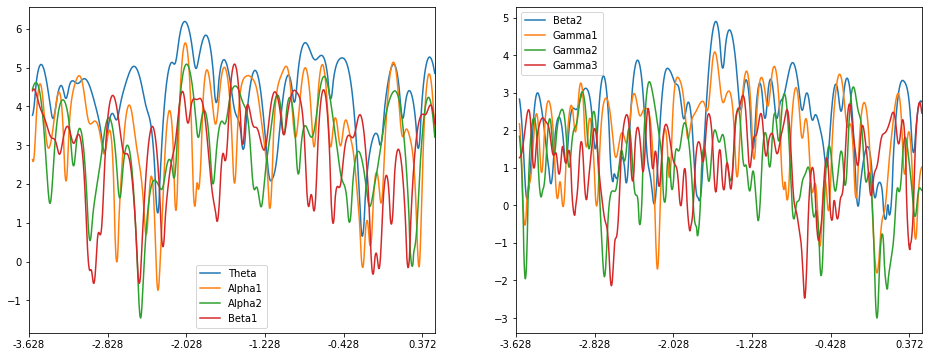

In [103]:
fig,ax=plt.subplots(1,2,figsize=(16,6))
newdf[['Theta','Alpha1','Alpha2','Beta1']].rolling(10).mean().plot(ax=ax[0])
newdf[['Beta2','Gamma1','Gamma2','Gamma3']].rolling(10).mean().plot(ax=ax[1])

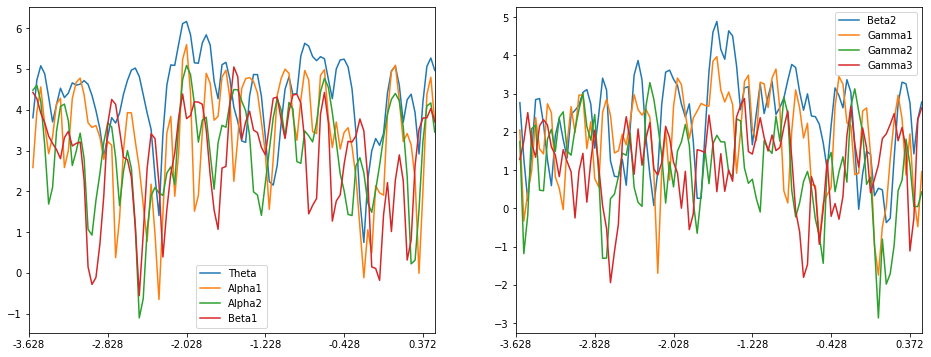

In [104]:
fig,ax=plt.subplots(1,2,figsize=(16,6))
newdf[['Theta','Alpha1','Alpha2','Beta1']].rolling(10).mean().iloc[::10].plot(ax=ax[0])
newdf[['Beta2','Gamma1','Gamma2','Gamma3']].rolling(10).mean().iloc[::10].plot(ax=ax[1])

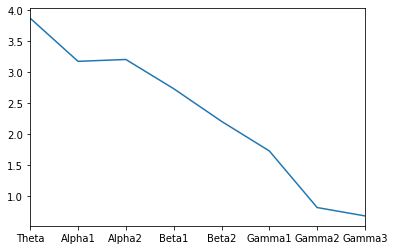

In [96]:
newdf.mean().plot()

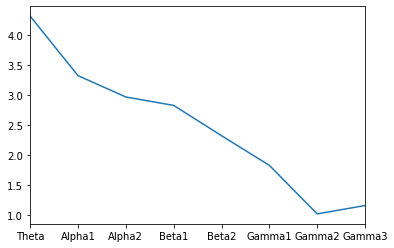

In [105]:
newdf.mean().plot()

In [108]:
trialDF=pd.read_csv('/Users/yyu/Documents/Psychology/insight/EEG_data/timeIndices_cra.csv')

In [117]:
tmp=trialDF.groupby(['Subject','Type']).count()[['Trial']].reset_index().pivot(columns='Subject',index='Type').T
tmp['total']=tmp.sum(axis=1)
tmp['total_solved']=tmp['ANA']+tmp['INS']
tmp.describe()

Type,ANA,INS,TO,total,total_solved
count,39.000,39.000,39.000,39.000,39.000
mean,20.333,26.436,81.333,128.103,46.769
std,11.018,14.138,21.309,19.302,11.886
min,4.000,2.000,29.000,78.000,18.000
25%,11.000,18.000,68.500,121.500,36.500
50%,20.000,25.000,85.000,137.000,47.000
75%,29.000,32.500,98.000,141.000,56.000
max,44.000,60.000,115.000,150.000,68.000


# New Data

In [2]:
folder='/Users/yyu/Documents/Psychology/insight/EEG_data/export/'
processdfolder='/Users/yyu/Documents/Psychology/insight/EEG_data/processed/'

In [8]:
subid='102'

In [35]:
file=folder+subid+'/log_102_TO_66.csv'
allData,featLbl = utility.preprocess(file)

In [36]:
allData.head()

featLbl,timeToStim,timeToResp,"1.0,4.3","1.0,8.3","1.0,10.7","1.0,14.6","1.0,19.2","1.0,26.0","1.0,35.1","1.0,43.2",...,"16.0,35.1","16.0,43.2","18.0,4.3","18.0,8.3","18.0,10.7","18.0,14.6","18.0,19.2","18.0,26.0","18.0,35.1","18.0,43.2"
2,-1.092,-15.092,-7.838,-5.992,-12.116,-3.609,-3.546,-9.822,-6.859,-14.933,...,-22.884,-26.658,-15.460,-26.745,-26.651,-26.713,-32.122,-39.646,-28.996,-32.115
3,-1.056,-15.056,-14.469,-6.767,-14.428,-4.984,-6.825,-9.189,-5.727,-15.112,...,-22.318,-27.339,-14.889,-26.439,-24.005,-26.330,-34.347,-33.315,-31.671,-33.516
4,-1.016,-15.016,-10.980,-7.992,-23.485,-7.512,-12.362,-9.830,-5.837,-14.044,...,-20.952,-31.419,-15.183,-32.241,-23.062,-24.217,-29.309,-32.840,-36.398,-38.358
5,-0.976,-14.976,-5.666,-6.814,-12.412,-7.559,-10.171,-10.010,-8.108,-10.668,...,-20.920,-30.945,-15.618,-23.773,-21.974,-24.113,-29.660,-42.775,-34.349,-41.412
6,-0.940,-14.940,0.764,-5.147,-4.995,-4.361,-11.909,-11.514,-14.170,-9.017,...,-21.668,-31.364,-15.830,-18.547,-21.274,-26.924,-32.741,-34.399,-32.195,-37.299


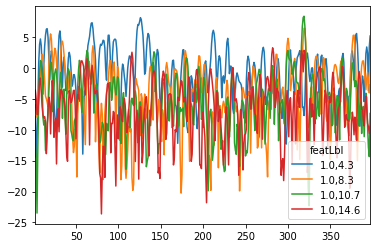

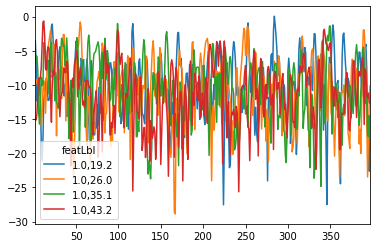

In [37]:
for i in range(2):
    allData[featLbl[i*4:i*4+4]].plot()

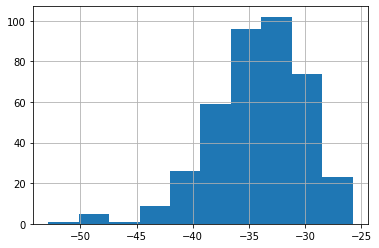

In [38]:
allData[featLbl[-1]].hist()

In [33]:
allDataProc=pd.read_csv(processdfolder+subid+'/log_102_TO_66.csv',index_col=None)

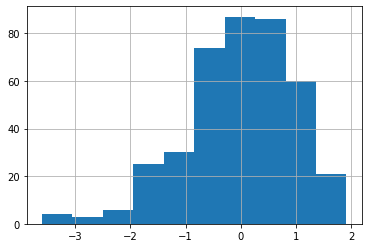

In [34]:
allDataProc[featLbl[-1]].hist()

In [39]:
np.corrcoef(allDataProc[featLbl[-1]],allData[featLbl[-1]])

array([[1.        , 0.99871415],
       [0.99871415, 1.        ]])

In [60]:
crossdf=pd.read_csv(folder+subid+'/cross_'+subid+'_'+solType+'_'+trialNum+'.csv',index_col=None,header=None)
crossdf.head()

,0,1,2,3,4,5,6,7,8,9,...,288,289,290,291,292,293,294,295,296,297
0,nan,nan,nan,-11.040,-11.004,-10.964,-10.928,-10.888,-10.848,-10.812,...,-0.080,-0.040,-0.004,0.036,0.072,0.112,0.152,0.188,0.228,0.268
1,nan,nan,nan,-0.962,-0.926,-0.886,-0.850,-0.810,-0.770,-0.734,...,9.998,10.038,10.074,10.114,10.150,10.190,10.230,10.266,10.306,10.346
2,1.000,2.000,4.300,1.402,0.825,0.678,0.739,0.680,0.459,0.235,...,0.925,0.874,1.141,1.317,1.575,2.128,2.792,2.847,2.091,1.152
3,1.000,2.000,8.300,0.980,2.152,3.112,2.554,1.294,0.560,0.221,...,0.417,0.459,1.029,1.581,1.391,0.682,0.195,0.316,0.367,0.385
4,1.000,2.000,10.700,2.507,3.139,3.293,2.766,1.713,0.792,0.207,...,0.110,0.180,0.429,0.646,0.642,0.432,0.245,0.287,0.205,0.182


In [61]:
timeToResp=crossdf.iloc[0][3:].values
timeToStim=crossdf.iloc[1][3:].values
allData=crossdf.iloc[2:,:]
allData.rename(columns={0:'compNum1',1:'compNum2',2:'freq'},inplace=True)

In [74]:
tmp = allData[(allData['compNum1']==1)&(allData['compNum2']==3)].drop(columns=['compNum1','compNum2'])
tmp.set_index('freq',inplace=True)
tmp=tmp.T

In [75]:
tmp['timeToResp']=timeToResp
tmp.set_index('timeToResp',inplace=True)
tmp.head()

freq,4.300,8.300,10.700,14.600,19.200,26.000,35.100,43.200
timeToResp,,,,,,,,
-11.040,0.833,0.167,0.143,0.036,0.047,0.057,0.027,0.175
-11.004,0.654,0.289,0.213,0.034,0.070,0.096,0.019,0.236
-10.964,0.692,0.261,0.308,0.056,0.125,0.274,0.014,0.275
-10.928,0.998,0.165,0.345,0.056,0.179,0.372,0.018,0.228
-10.888,1.067,0.278,0.344,0.026,0.138,0.288,0.044,0.141


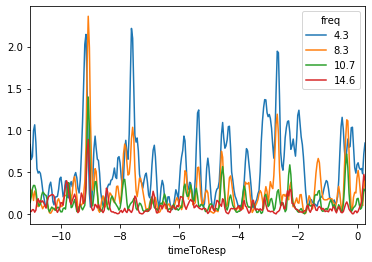

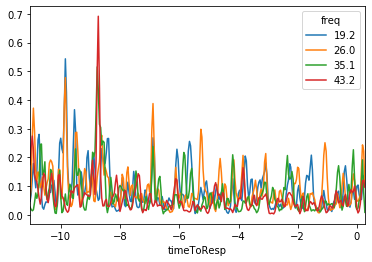

In [76]:
cols=tmp.columns
for i in range(2):
    tmp[cols[i*4:i*4+4]].iloc[:,:].plot()

In [70]:
tmp.describe()

freq,4.300,8.300,10.700,14.600,19.200,26.000,35.100,43.200
count,295.000,295.000,295.000,295.000,295.000,295.000,295.000,295.000
mean,0.347,0.231,0.177,0.093,0.044,0.024,0.015,0.011
std,0.236,0.199,0.167,0.079,0.028,0.018,0.010,0.006
min,0.035,0.005,0.005,0.003,0.004,0.003,0.000,0.001
25%,0.169,0.089,0.076,0.038,0.024,0.012,0.008,0.007
50%,0.291,0.169,0.123,0.064,0.038,0.019,0.012,0.010
75%,0.447,0.307,0.213,0.119,0.056,0.028,0.019,0.014
max,1.238,1.064,1.026,0.418,0.164,0.100,0.060,0.036
